Resources:
https://machinelearningmastery.com/make-predictions-scikit-learn/
https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

In [3]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [4]:
plt.rcParams["figure.figsize"] = [10, 10]

In [13]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

URLError: <urlopen error [Errno 54] Connection reset by peer>

In [ ]:
print(dataset.shape)

In [ ]:
print(dataset.tail(5))

In [6]:
print(dataset.describe())

NameError: name 'dataset' is not defined

In [7]:
print(dataset.groupby('class').size())

NameError: name 'dataset' is not defined

In [8]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

NameError: name 'dataset' is not defined

# Box and Whisker Plot
A box and whisker plot—also called a box plot—displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum.

In [9]:
# histograms
dataset.hist()
plt.show()

NameError: name 'dataset' is not defined

In [10]:
# scatter plot matrix
scatter_matrix(dataset)
plt.plot(figsize=(15,15))
# plt.show()

NameError: name 'dataset' is not defined

In [11]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
training_seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=training_seed)



NameError: name 'dataset' is not defined

# train_test_split

In [12]:
X[0:1], Y[0:1]

NameError: name 'X' is not defined

In [2]:
len(X), len(X[0]), len(Y), len(Y[0])

NameError: name 'X' is not defined

We are using the metric of ‘accuracy‘ to evaluate models. This is a ratio of the number of correctly predicted instances in divided by the total number of instances

In [13]:
# Test options and evaluation metric
testing_seed = 7
scoring = 'accuracy'

In [25]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('K Neighbors Classifier', KNeighborsClassifier()))
models.append(('CART (DecisionTreeClassifier)', DecisionTreeClassifier()))
models.append(('NB (GaussianNB)', GaussianNB()))
models.append(('SVM (SVC)', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=testing_seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Logistic Regression: 0.966667 (0.040825)
Linear Discriminant Analysis: 0.975000 (0.038188)
K Neighbors Classifier: 0.983333 (0.033333)
CART (DecisionTreeClassifier): 0.975000 (0.038188)
NB (GaussianNB): 0.975000 (0.053359)
SVM (SVC): 0.991667 (0.025000)


In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

clf = SVC(kernel='linear', C=1)
cv_results = cross_validate(clf, X_train, Y_train, cv=5, return_estimator=True)

for model in cv_results['estimator']:
    print(model.predict([[ 6.7, 3.0, 5.2, 2.3]]))

['Iris-virginica']
['Iris-virginica']
['Iris-virginica']
['Iris-virginica']
['Iris-virginica']


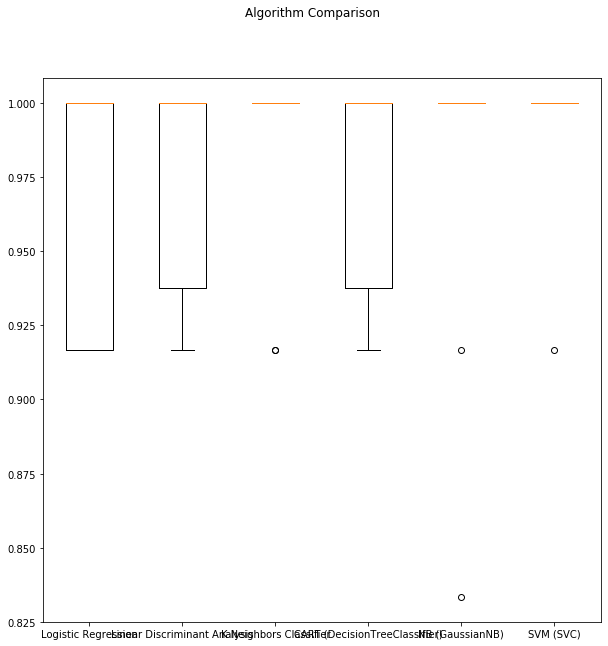

In [15]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [17]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



NotFittedError: This LogisticRegression instance is not fitted yet